# Import Library

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
sns.set_theme()

# Dataset

In [544]:
df = pd.read_csv('dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data info

In [545]:
missing = df.isnull().sum()
per_mis = 100*(missing/len(df))
data_type = df.dtypes
number_unique = df.nunique()
pd.DataFrame({"Missing" : missing,
                "data_type": data_type,
                "number_unique" : number_unique})

,Missing,data_type,number_unique
age,0,int64,41
sex,0,int64,2
cp,0,int64,4
trtbps,0,int64,49
chol,0,int64,152
fbs,0,int64,2
restecg,0,int64,3
thalachh,0,int64,91
exng,0,int64,2
oldpeak,0,float64,40


# EDA

In [546]:
diskrit = ['sex','exng','caa','cp','fbs','restecg','slp','thall','output']
kontinu = ['age','trtbps','chol','thalachh','oldpeak']

### countplot

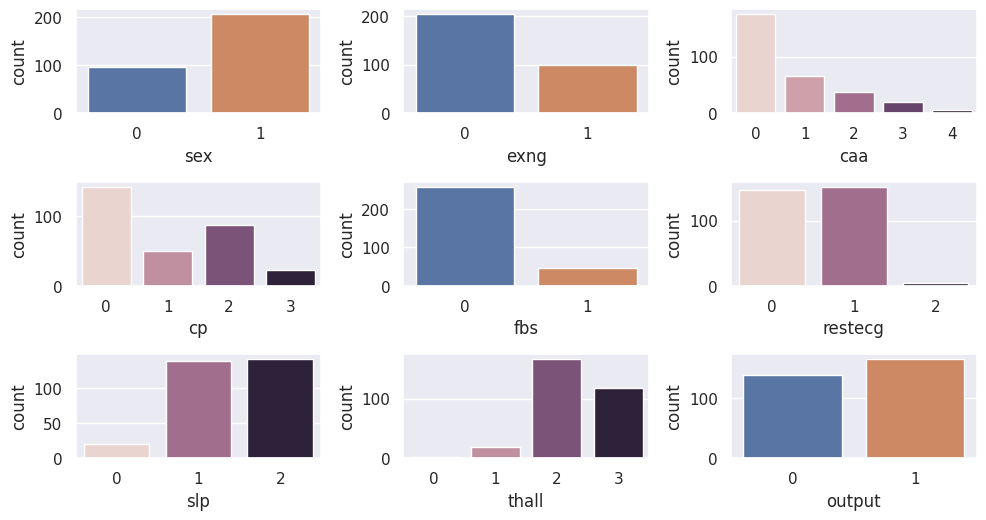

In [547]:
fig = plt.figure(figsize=(10,10))
for index,col in enumerate(diskrit):
    plt.subplot(6,3,index+1)
    sns.countplot(x=col, data=df, hue=col, legend=False)
fig.tight_layout(pad=1.0)

### histplot (histogram)

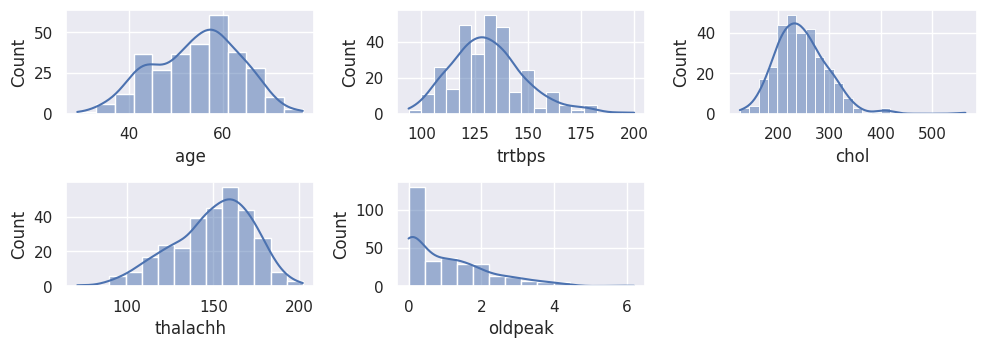

In [548]:
fig = plt.figure(figsize=(10,10))
for index,col in enumerate(kontinu):
    plt.subplot(6,3,index+1)
    sns.histplot(df[col], kde=True)
fig.tight_layout(pad=1.0)

### korelasi

In [549]:
corr_matrix = df.corr()

<Axes: >

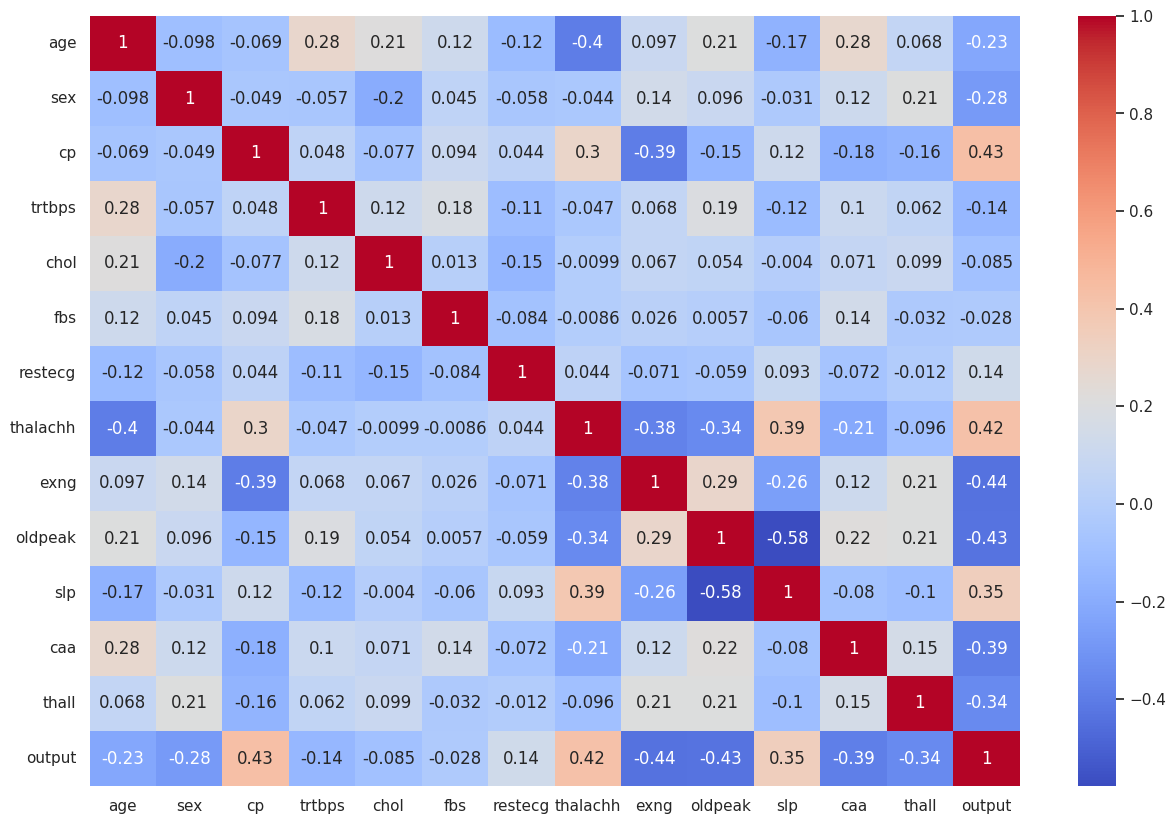

In [550]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

### hasil EDA

In [551]:
df = df.drop(columns=['fbs'])

Dari EDA saya mendapatkan bahwa feature fbs yang memiliki 2 unique value yaitu 0 dan 1 tidak memiliki korelasi yang cukup baik dengan feature target ini dapat dilihat pada visualisasi countplot dimana terlihat feature fbs hannya di dominasi oleh nilai 1 dan heatmap correlation dapat dilihat bahwa nilai korelasinya hanya sebesar 0.02 jadi saya memutuskan untuk tidak menggunakan feature ini.

# Outliers

age            Axes(0.125,0.11;0.133621x0.77)
trtbps      Axes(0.285345,0.11;0.133621x0.77)
chol         Axes(0.44569,0.11;0.133621x0.77)
thalachh    Axes(0.606034,0.11;0.133621x0.77)
oldpeak     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

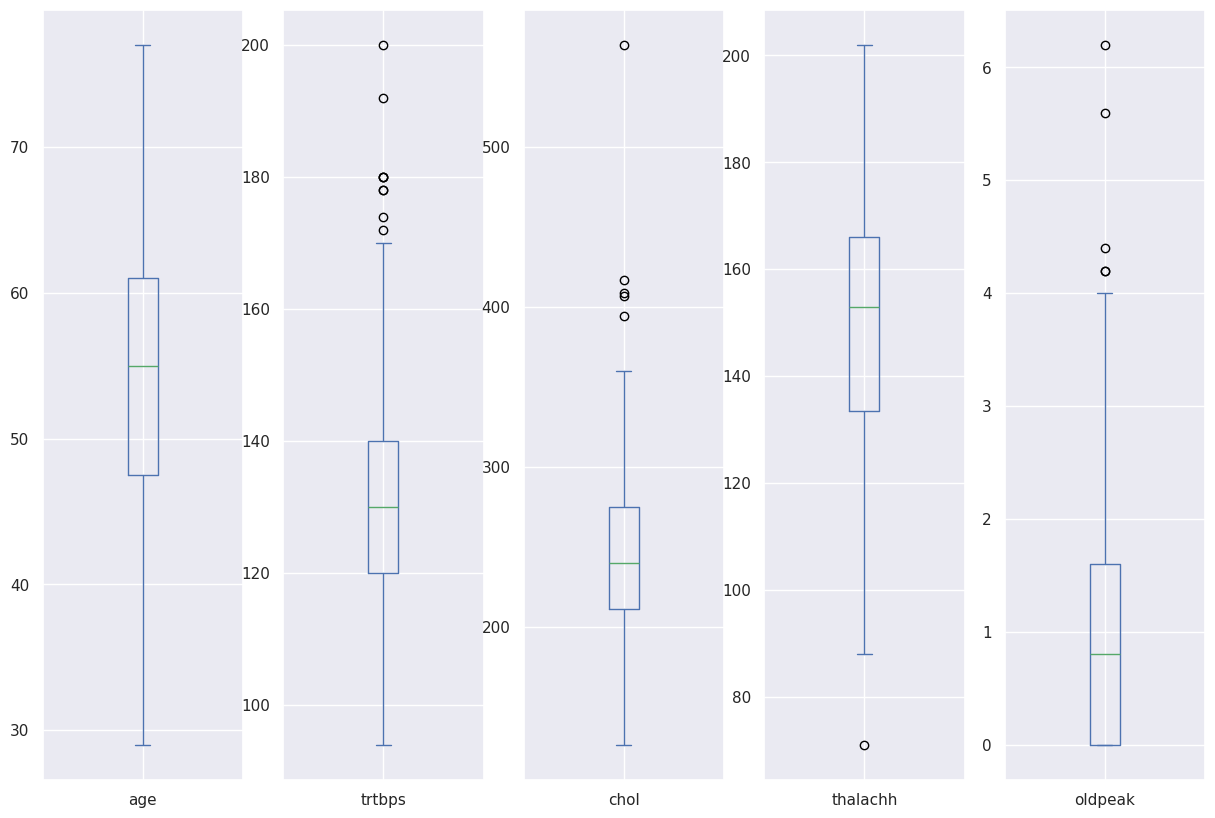

In [552]:
df[kontinu].plot(kind='box', subplots=True, figsize=(15,10))

Tidak ada outlier yang terlalu signifikan pada data kontinue

# Splitting Dataset

In [553]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling

In [555]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Training

In [556]:
svc = SVC(C=1, gamma=0.1, random_state=42)
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.1, random_state=42)

In [557]:
pred = svc.predict(X_test)

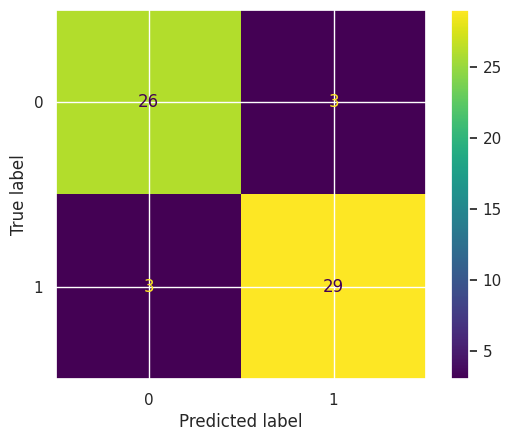

In [558]:
from sklearn import metrics

actual = y_test
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [559]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

